<a href="https://colab.research.google.com/github/tomat8jpg/HW_RiboSEQ/blob/main/Ribo_Seq_part1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
rna_r <- read.csv('/content/rna_r.tsv', header = TRUE, check.names=FALSE, row.names = 1, sep = "\t")
rna_design <- read.csv('/content/rna_design.tsv', header = TRUE, row.names = 1, sep = "\t")

In [2]:
rna_design

,condition,experiment,colour
,<chr>,<chr>,<chr>
LC001-normal-RNA,normal,RNA,blue
LC001-tumor-RNA,tumor,RNA,red
LC033-normal-RNA,normal,RNA,blue
LC033-tumor-RNA,tumor,RNA,red
LC034-normal-RNA,normal,RNA,blue
LC034-tumor-RNA,tumor,RNA,red
LC501-normal-RNA,normal,RNA,blue
LC501-tumor-RNA,tumor,RNA,red
LC502-normal-RNA,normal,RNA,blue


In [3]:
head(rna_r)

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
ENSG00000000003.14,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857
ENSG00000000419.12,88,187,66,201,80,16,54,165,57,174,61,155,104,114,92,170,60,244,56,83
ENSG00000000457.13,60,106,70,156,77,67,78,68,97,128,76,185,114,74,127,176,55,261,68,176
ENSG00000000460.16,18,70,4,63,60,4,17,112,28,14,8,118,25,98,124,437,34,201,9,58
ENSG00000000938.12,19,9,61,24,106,57,60,9,65,36,16,66,64,32,94,13,42,26,26,57
ENSG00000000971.15,5339,443,3956,9324,6288,508,4415,1817,5602,12431,3716,9145,3330,3548,2824,5456,4117,3431,3011,6181


In [4]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘lambda.r’, ‘futile.options’, ‘XML’, ‘xtable’, ‘RSQLite’, ‘KEGGREST’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘AnnotationDbi’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘geneplotter’, ‘Rcpp’, ‘RcppArmadillo’


Old packages: 'bit', 'data.table', 'devtools', 'gert', 'htmltools', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass

In [6]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: M

In [5]:
browseVignettes("DESeq2")

starting httpd help server ...
 done



In [7]:
mat_rna_r = data.matrix(rna_r)
mat_rna_design = data.matrix(rna_design)

In [8]:
dds = DESeqDataSetFromMatrix(countData = mat_rna_r, 
                             colData = mat_rna_design,
                             design = ~ condition)
                             
dds <- DESeq(dds)
res <- results(dds)

# , name="condition_normal_vs_tumor"
# or to shrink log fold changes association with condition:
# res <- lfcShrink(dds, coef="condition_trt_vs_untrt", type="apeglm")

converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 964 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [9]:
resultsNames(dds)

[1] "Intercept" "condition"

In [10]:
res05 <- results(dds, alpha=0.05)
summary(res05)


out of 15000 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 2881, 19%
LFC < 0 (down)     : 1922, 13%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [11]:
sum(res05$padj < 0.05, na.rm=TRUE)

[1] 4803

Десек2 выделил 4803 вариабельных гена

In [13]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("apeglm")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'apeglm'

also installing the dependencies ‘numDeriv’, ‘bdsmatrix’, ‘mvtnorm’, ‘plyr’, ‘coda’, ‘bbmle’, ‘emdbook’, ‘RcppEigen’, ‘RcppNumerical’


Old packages: 'bit', 'data.table', 'devtools', 'gert', 'htmltools', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass', 'stringr', 'testthat',
  'tidyverse', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign'



In [14]:
resLFC <- lfcShrink(dds, coef="condition", type="apeglm")
resLFC

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): condition 
Wald test p-value: condition 
DataFrame with 15123 rows and 5 columns
                    baseMean log2FoldChange     lfcSE      pvalue        padj
                   <numeric>      <numeric> <numeric>   <numeric>   <numeric>
ENSG00000000003.14  406.2793       0.843946  0.393418  0.00997859   0.0343158
ENSG00000000419.12  105.8720       0.535531  0.306674  0.04645172   0.1128382
ENSG00000000457.13  104.4803       0.270447  0.226515  0.20059935   0.3354548
ENSG00000000460.16   62.8126       1.233411  0.576180  0.00468794   0.0190089
ENSG00000000938.12   43.1990      -0.943248  0.378115  0.00325988   0.0143369
...                      ...            ...       ...         ...         ...
ENSG00000282651.1    0.00000             NA        NA          NA          NA
ENSG00000282883.1    0.00000             NA        NA          NA          NA
ENSG00000282936.1    5.21416      -0.434764  0.564958 2.07183e-01 3.43283e-01
ENSG00000282988.1   10.08391       4.

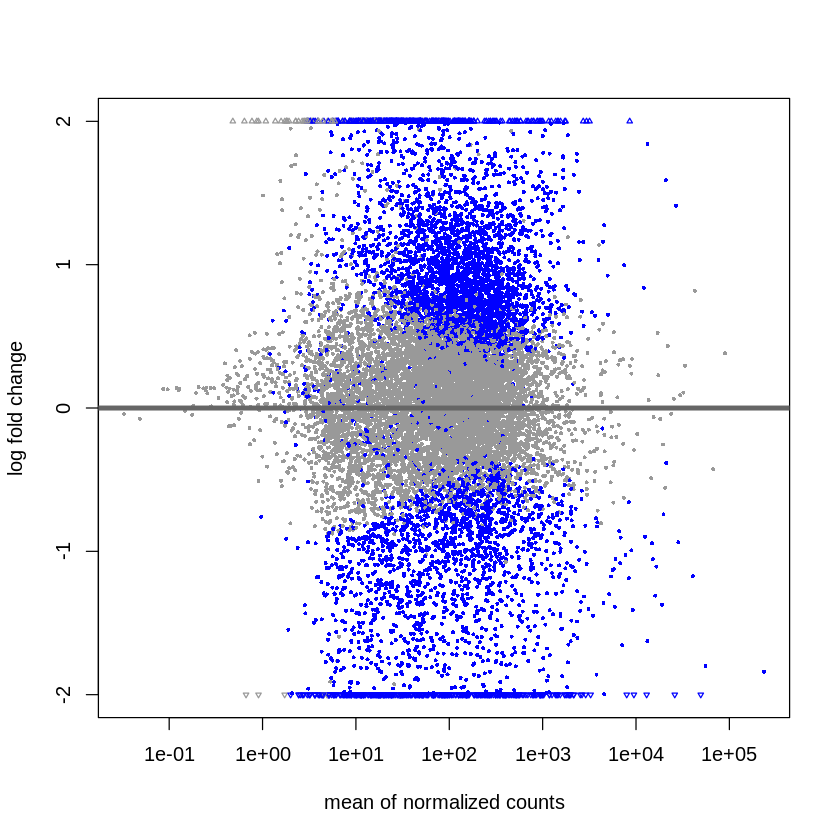

In [15]:
plotMA(resLFC, ylim=c(-2,2))

In [16]:
  if (!requireNamespace('BiocManager', quietly = TRUE))
    install.packages('BiocManager')

  BiocManager::install('EnhancedVolcano')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'EnhancedVolcano'

also installing the dependency ‘ggrepel’


Old packages: 'bit', 'data.table', 'devtools', 'gert', 'htmltools', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass', 'stringr', 'testthat',
  'tidyverse', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign'



In [17]:
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



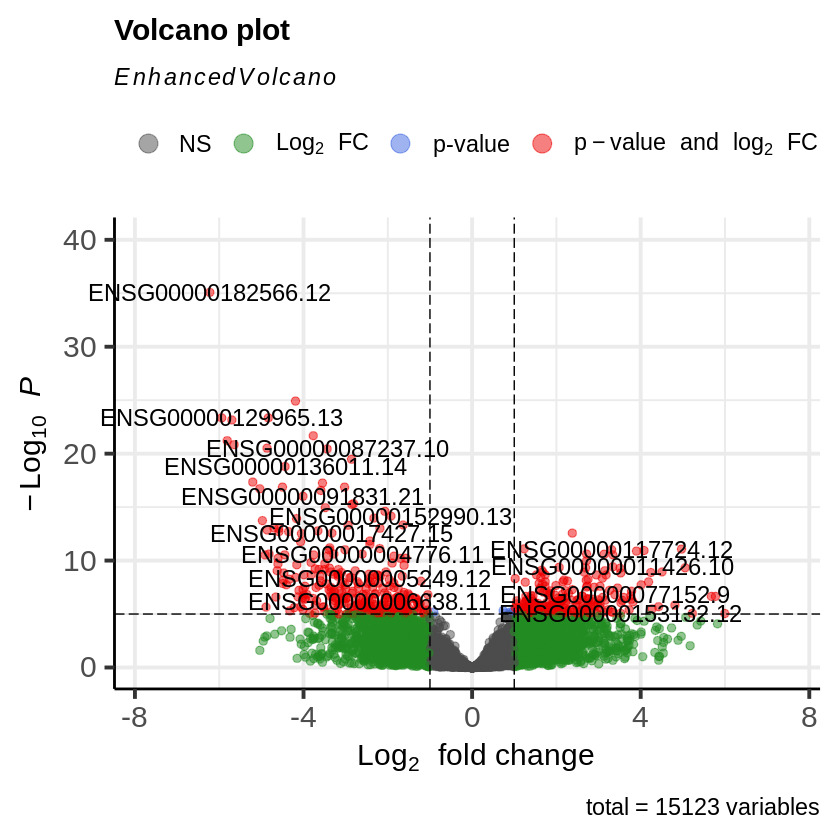

In [25]:
EnhancedVolcano(res05,
  lab = rownames(res05),
  x = 'log2FoldChange',
  y = 'padj')

In [33]:
resOrdered <- res[order(res$pvalue),]
resSig <- subset(resOrdered, padj < 0.05)
summary(resSig)


out of 4803 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2881, 60%
LFC < 0 (down)     : 1922, 40%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [34]:
write.csv(as.data.frame(resSig), 
          file="RNA_DESEq2.csv")

### RIBOSEQ

In [35]:
ribo_r <- read.csv('/content/ribo_r.tsv', header = TRUE, check.names=FALSE, row.names = 1, sep = "\t")
ribo_design <- read.csv('/content/ribo_design.tsv', header = TRUE, row.names = 1, sep = "\t")

In [36]:
mat_ribo_r = data.matrix(ribo_r)
mat_ribo_design = data.matrix(ribo_design)

In [37]:
dds = DESeqDataSetFromMatrix(countData = mat_ribo_r, 
                             colData = mat_ribo_design,
                             design = ~ condition)
                             
dds <- DESeq(dds)
res <- results(dds)

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 746 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [38]:
res05 <- results(dds, alpha=0.05)
summary(res05)


out of 14942 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 1539, 10%
LFC < 0 (down)     : 1008, 6.7%
outliers [1]       : 0, 0%
low counts [2]     : 1462, 9.8%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [39]:
sum(res05$padj < 0.05, na.rm=TRUE)

[1] 2547

Десек2 на данных рнксек выделил 4803 дифференциально экспрессированных гена с p-adj < 0.05, a на данных рибосек 2547 гена

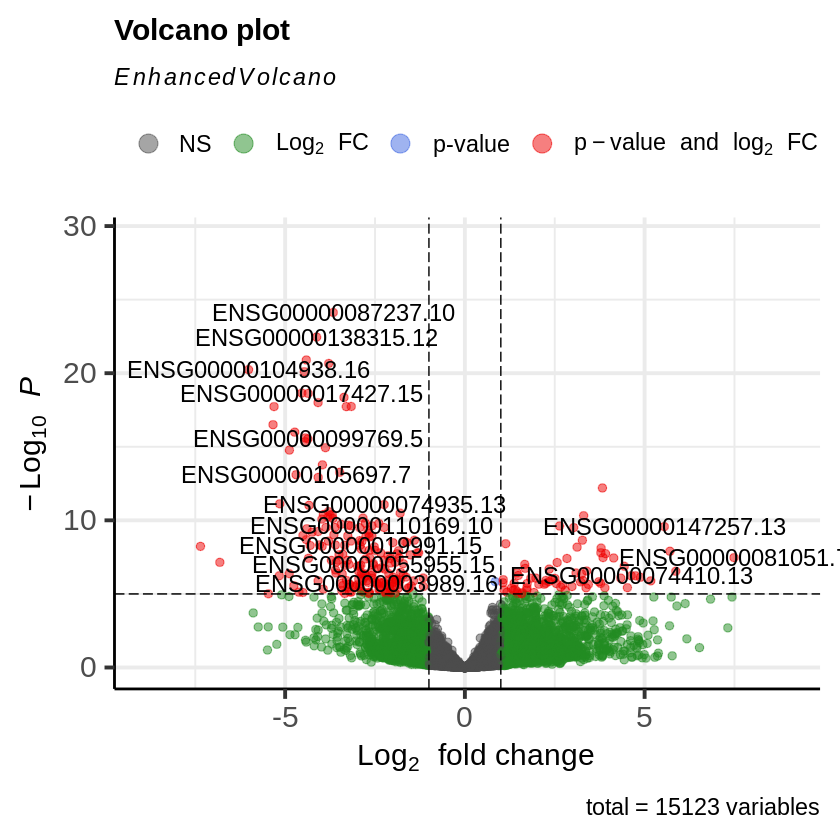

In [40]:
EnhancedVolcano(res05,
  lab = rownames(res05),
  x = 'log2FoldChange',
  y = 'padj')

In [41]:
resOrdered <- res[order(res$pvalue),]
resSig <- subset(resOrdered, padj < 0.05)
summary(resSig)


out of 2532 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1527, 60%
LFC < 0 (down)     : 1005, 40%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [42]:
write.csv(as.data.frame(resSig), 
          file="RIBO_DESEq2.csv")

Совпадают ли результаты
дифференциальной экспрессии? Какие гены оказались значимо различны по
экспрессии в одном случае, а какие — в другом?

In [45]:
RIBO_DESEq2 <- read.csv('/content/RIBO_DESEq2.csv', header = TRUE, row.names = 1, sep = ",")
RNA_DESEq2 <- read.csv('/content/RNA_DESEq2.csv', header = TRUE, row.names = 1, sep = ",")

In [48]:
head(RIBO_DESEq2, 10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000087237.10,234.70620,-3.661183,0.3276725,-11.173300,5.509496e-29,7.594289e-25
ENSG00000138315.12,378.52710,-4.123961,0.3831836,-10.762363,5.182391e-27,3.571704e-23
ENSG00000145850.8,115.82332,-4.410436,0.4245570,-10.388327,2.802259e-25,1.287545e-21
ENSG00000152990.13,351.27207,-3.789148,0.3675627,-10.308848,6.426692e-25,2.214638e-21
ENSG00000104938.16,60.02565,-6.018982,0.5904429,-10.194013,2.108752e-24,5.813407e-21
ENSG00000145708.10,407.10527,-4.466723,0.4402874,-10.145017,3.487172e-24,8.011197e-21
ENSG00000017427.15,105.10942,-4.535441,0.4629190,-9.797484,1.154243e-22,2.272870e-19
ENSG00000175336.9,2095.24860,-4.358198,0.4457106,-9.778091,1.398233e-22,2.409156e-19
ENSG00000133800.8,237.67501,-3.363834,0.3466703,-9.703265,2.920009e-22,4.472157e-19


In [49]:
head(RNA_DESEq2, 10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000182566.12,187.90251,-6.224141,0.4702707,-13.23523,5.492768e-40,8.239153e-36
ENSG00000138315.12,207.43331,-4.190117,0.3714189,-11.28138,1.621854e-29,1.216390e-25
ENSG00000129965.13,517.46627,-5.941784,0.5452388,-10.89758,1.183629e-27,4.510130e-24
ENSG00000166148.3,216.78520,-4.836039,0.4438310,-10.89613,1.202701e-27,4.510130e-24
ENSG00000160339.15,154.17031,-5.700932,0.5261450,-10.83529,2.342298e-27,7.026894e-24
ENSG00000126759.12,132.31021,-3.768272,0.3587976,-10.50250,8.412291e-26,2.103073e-22
ENSG00000104938.16,83.52526,-5.810490,0.5593910,-10.38717,2.836406e-25,6.078013e-22
ENSG00000105697.7,1417.02785,-5.646195,0.5486155,-10.29172,7.679486e-25,1.439904e-21
ENSG00000142748.12,326.18366,-4.865946,0.4767269,-10.20699,1.845044e-24,3.075073e-21


In [53]:
RNA_DESEq2$baseMean <- NULL
RNA_DESEq2$log2FoldChange <- NULL
RNA_DESEq2$lfcSE <- NULL
RNA_DESEq2$stat <- NULL
RNA_DESEq2$pvalue <- NULL
RNA_DESEq2$padj <- NULL
head(RNA_DESEq2)

ENSG00000182566.12
ENSG00000138315.12
ENSG00000129965.13
ENSG00000166148.3
ENSG00000160339.15
ENSG00000126759.12


In [57]:
copyRNA_DESEq2 <- RNA_DESEq2 
copyRNA_DESEq2$rn <- row.names(RNA_DESEq2) 
head(copyRNA_DESEq2)

,rn
,<chr>
ENSG00000182566.12,ENSG00000182566.12
ENSG00000138315.12,ENSG00000138315.12
ENSG00000129965.13,ENSG00000129965.13
ENSG00000166148.3,ENSG00000166148.3
ENSG00000160339.15,ENSG00000160339.15
ENSG00000126759.12,ENSG00000126759.12


In [54]:
RIBO_DESEq2$baseMean <- NULL
RIBO_DESEq2$log2FoldChange <- NULL
RIBO_DESEq2$lfcSE <- NULL
RIBO_DESEq2$stat <- NULL
RIBO_DESEq2$pvalue <- NULL
RIBO_DESEq2$padj <- NULL
head(RIBO_DESEq2)

ENSG00000087237.10
ENSG00000138315.12
ENSG00000145850.8
ENSG00000152990.13
ENSG00000104938.16
ENSG00000145708.10


In [58]:
copyRIBO_DESEq2 <- RIBO_DESEq2 
copyRIBO_DESEq2$rn <- row.names(RIBO_DESEq2) 
head(copyRIBO_DESEq2)

,rn
,<chr>
ENSG00000087237.10,ENSG00000087237.10
ENSG00000138315.12,ENSG00000138315.12
ENSG00000145850.8,ENSG00000145850.8
ENSG00000152990.13,ENSG00000152990.13
ENSG00000104938.16,ENSG00000104938.16
ENSG00000145708.10,ENSG00000145708.10


In [64]:
genes = merge(copyRIBO_DESEq2, copyRNA_DESEq2)
head(genes)

,rn
,<chr>
1,ENSG00000000460.16
2,ENSG00000001036.13
3,ENSG00000003989.16
4,ENSG00000005001.9
5,ENSG00000005156.11
6,ENSG00000005187.11


In [66]:
dim(genes)

[1] 1648    1

Рибосек и Рнксек определяют 1648 генов дифференциально экспрессированы одинаково   
Рибосек дает 899 уникальных вариабельных гена  
Рнк сек дает 3155 уникальных вариабельных гена  


Проведите похожий анализ,
только с поиском генов с разницей в эффективности трансляции (~ method +
condition + method:condition). Что вы скажете о наборе генов, который
вы получили этим методом? Выводы подкрепите графиками.

In [81]:
counts <- read.csv('/content/counts.tsv', header = TRUE, check.names=FALSE, row.names = 1, sep = '')
head(counts)

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,⋯,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,⋯,218,457,0,0,200,889,0,0,161,857
ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,⋯,92,170,109,357,60,244,141,173,56,83
ENSG00000000457.13,65,121,60,106,36,163,70,156,130,76,⋯,127,176,67,176,55,261,64,100,68,176
ENSG00000000460.16,8,43,18,70,16,76,4,63,44,14,⋯,124,437,7,167,34,201,6,61,9,58
ENSG00000000938.12,0,6,19,9,14,13,61,24,15,62,⋯,94,13,3,9,42,26,7,10,26,57
ENSG00000000971.15,20021,1902,5339,443,18200,34652,3956,9324,46412,1579,⋯,2824,5456,24558,12238,4117,3431,19747,27766,3011,6181


In [82]:
design <- read.csv('/content/design.tsv', header = TRUE, row.names = 1, sep = "")
design

,condition,experiment
,<chr>,<chr>
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF
LC001-normal-RNA,normal,RNA
LC001-tumor-RNA,tumor,RNA
LC033-normal-RPF,normal,RPF
LC033-tumor-RPF,tumor,RPF
LC033-normal-RNA,normal,RNA
LC033-tumor-RNA,tumor,RNA
LC034-normal-RPF,normal,RPF


In [83]:
mat_counts = data.matrix(counts)
mat_design = data.matrix(design)

In [84]:
dds = DESeqDataSetFromMatrix(countData = mat_counts, 
                             colData = mat_design,
                             design = ~ experiment + condition + experiment:condition )
                             
dds <- DESeq(dds)
res <- results(dds)

converting counts to integer mode

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 581 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [85]:
res05 <- results(dds, alpha=0.05)
summary(res05)


out of 15123 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 24, 0.16%
LFC < 0 (down)     : 15, 0.099%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [86]:
sum(res05$padj < 0.05, na.rm=TRUE)

[1] 39

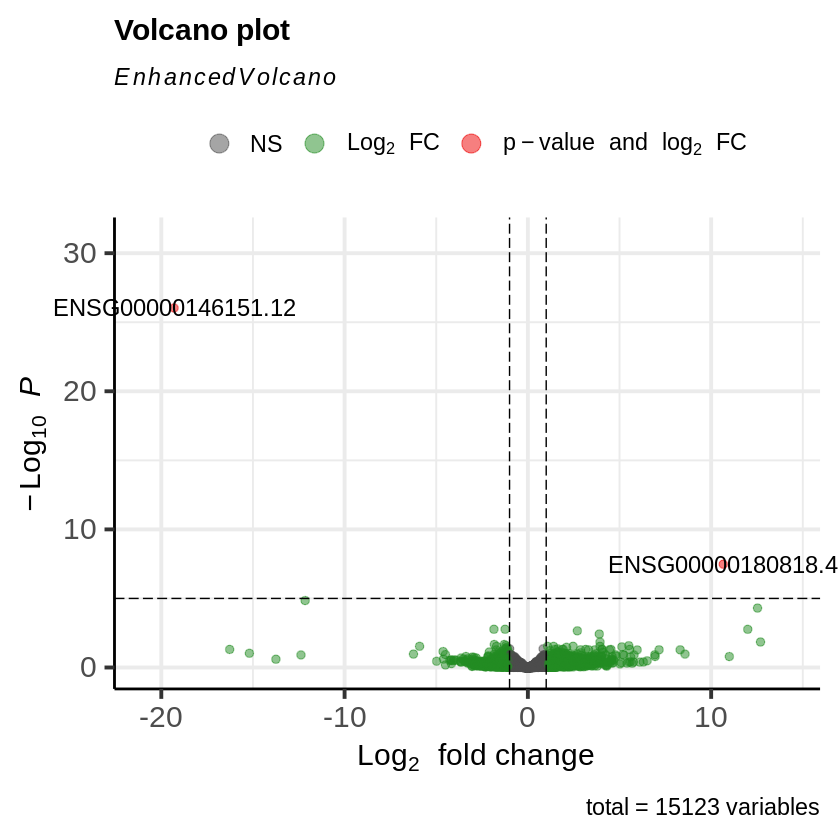

In [87]:
EnhancedVolcano(res05,
  lab = rownames(res05),
  x = 'log2FoldChange',
  y = 'padj')

In [88]:
resOrdered <- res[order(res$pvalue),]
resSig <- subset(resOrdered, padj < 0.05)
summary(resSig)


out of 39 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 24, 62%
LFC < 0 (down)     : 15, 38%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [89]:
write.csv(as.data.frame(resSig), 
          file="RIBORNA_DESEq2.csv")

Не во всех случаях транскрипция свидетельствует о трансляции. Было выделено 39 генов, у которых значительна разница в трансляции